### Importing packages:

In [5]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import easygui as eg
from PIL import Image
from rembg import remove
import numpy as np

### Setting dark background:

In [6]:
plt.style.use('dark_background')

### Inserting planets data:

In [7]:
planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
semimajor_axis = [0.3870993, 0.723336, 1.000003, 1.52371, 5.2029, 9.537, 19.189, 30.0699] #[AU] OY
orbital_period = [0.2408467, 0.61519726, 1.0000174, 1.8808158, 11.862615, 29.447498, 84.016846, 164.79132] #[years] OX
paths = ['./mercury.png', './venus.png', './earth.png', './mars.png', './jupiter.png', './saturn1.jpg', './uranus.png', 
         './neptune.png']

### Images:

In [8]:
input_path = './saturn1.jpg'
output_path = './saturn_output.png'

input = Image.open(input_path)
output = remove(input)
output.save(output_path)

if input_path in paths:
    index = paths.index(input_path)
    paths[index] = output_path

### Plot:

In [9]:
def get_image(path):
    if path == './saturn_output.png':
        return OffsetImage(plt.imread(path), zoom = 0.058)
    else:
        return OffsetImage(plt.imread(path), zoom = 0.08)

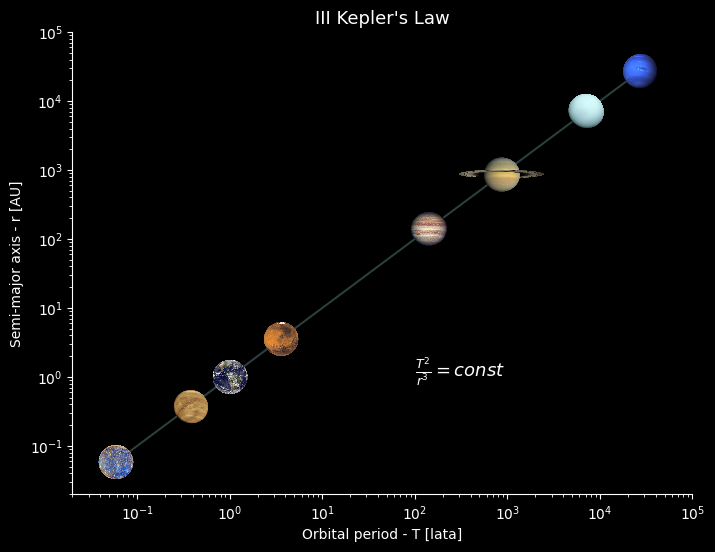

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.set_xscale('log')
ax.set_yscale('log')
o_p = list(map(lambda x: x**2, orbital_period))
s_a = list(map(lambda x: x**3, semimajor_axis))
plt.plot(o_p, s_a, alpha = 0.3)
ax.set_ylim(0.02, 10**5)
ax.set_xlim(0.02, 10**5)
ax.scatter(o_p, s_a)

for orbit, semimajor, path in zip(o_p, s_a,paths):
    ab = AnnotationBbox(get_image(path), (orbit, semimajor), frameon=False)
    ax.add_artist(ab)

plt.ylabel('Semi-major axis - r [AU]', fontsize = 10)
plt.xlabel('Orbital period - T [lata]', fontsize = 10)

plt.title("III Kepler's Law", fontsize = 13)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.text(10**2, 1, r"$\frac{T^2}{r^3} = const$", fontsize = 13)
#plt.savefig('III_kepler_law.pdf',dpi = 700 )
plt.show()